# **Data Analysis on The Supermarket Sales**





## Introduction

In this project, I will be analyzing the dataset of the **supermarket sales** in **3 big cities of Myanmar** on the **1st Quater of 2019**.

In order to ease the data analysis, I have given some visualizations with their respective description.


At the end of the project, I will be giving **some recommendations** to improve the supermarket sales in the 3 big cities of Myanmar.

Last but not the least, I would like to give a credit for **aungpyaeap** for giving the dataset on **kaggle**. Here is the link for the data source: https://www.kaggle.com/aungpyaeap/supermarket-sales 

##Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

    Invoice id: Computer generated sales slip invoice identification number

    Branch: Branch of supercenter (3 branches are available identified by A, B and C).

    City: Location of supercenters

    Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

    Gender: Gender type of customer

    Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

    Unit price: Price of each product in USD

    Quantity: Number of products purchased by customer

    Tax: 5% tax fee for customer buying

    Total: Total price including tax

    Date: Date of purchase (Record available from January 2019 to March 2019)

    Time: Purchase time (10am to 9pm)

    Payment: Payment used by customer for purchase (3 methods are available \u2013 Cash, Credit card and Ewallet)

    COGS: Cost of goods sold

    Gross margin percentage: Gross margin percentage

    Gross income: Gross income

    Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



## Importing the CSV File

In [3]:
data = pd.read_csv('supermarket_sales.csv')
data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Checking the name of the columns in the dataset

In [4]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Checking the datatype of all columns from the dataset

In [5]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
data['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

## Converting the 'Date' datatype from object into datetime

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

## Checking the datatype of all columns from the dataset

In [9]:
data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

### Setting the 'Date' column as the index for the dataset

In [10]:
data.set_index('Date', inplace = True)

In [11]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


As we can see from the table, the '**Date**' column is now **the index** of the table.

## A brief statistical summary of the data

In [12]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**50%** indicates the **median** of the dataset.

**25%** indicates the **1st quartile** of the dataset.

**75%** indicates the **3rd quartile** of the dataset

## A concise summary of the dataframe

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross 

Compared to the data.describe(), the data.info() shows some information which are more related to the **number of non-null values** and the **consumed memory**.

## The distribution of the customer ratings

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


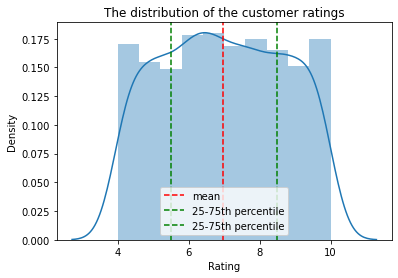

In [14]:
sns.distplot(data["Rating"])
plt.axvline(x = np.mean(data['Rating']), c = 'red', ls='--', label = 'mean')
plt.axvline(x = np.percentile(data['Rating'], 25), c = 'green', ls='--', label = '25-75th percentile')
plt.axvline(x = np.percentile(data['Rating'], 75), c = 'green', ls = '--', label = '25-75th percentile')
plt.title("The distribution of the customer ratings")
plt.legend()

In [15]:
print("Mean = " + str(round(np.mean(data['Rating']), 2)))
print("25th percentile = " + str(round(np.percentile(data['Rating'], 25), 2)))
print("75th percentile = " + str(round(np.percentile(data['Rating'], 75), 2)))

Mean = 6.97
25th percentile = 5.5
75th percentile = 8.5


According to the graph, we can observe that on **average**, the customer ratings would be about **6.97**

In addition, the **25-75th percentile** lies between **5.5** and **8.5**

## The histogram of each column from the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456f8529e8>,
      dtype=object)

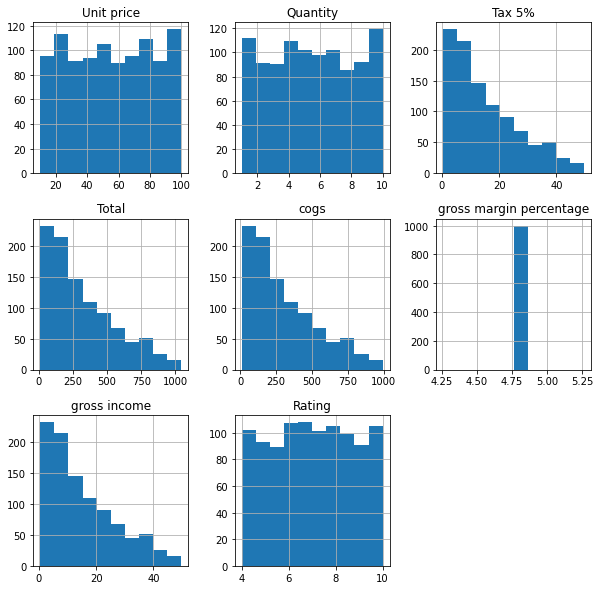

In [16]:
data.hist(figsize = (10, 10))

From the histograms, we can see that the distribution of the '**Unit Price**', '**Quantity**', and '**Rating**' are **distributed evenly**.

While, the '**Tax 5%**', '**Total**', '**cogs**', '**gross income**' are **right skewed**, which means that  most of the records have **lower values** for each of the **4 attributes**.

Surprisingly, all of the records have a the **same value** of the '**gross margin percentage**'.

## Comparing the number of invoices for each branch




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


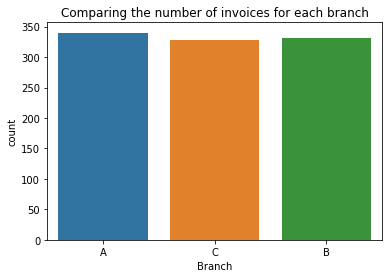

In [17]:
sns.countplot(data['Branch'])
plt.title("Comparing the number of invoices for each branch")
plt.show()

In [18]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

From the bar graphs, we can see that **all** of the 3 **branches** have **similar** number of invoices.

## Comparing the number of invoices for each city

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


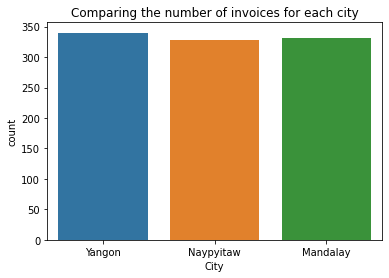

In [19]:
sns.countplot(data['City'])
plt.title("Comparing the number of invoices for each city")
plt.show()

In [20]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

From the bar graphs, we can see that **all** of the 3 **cities** have **similar** number of invoices.

## Comparing the number of invoices for each type of customer

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


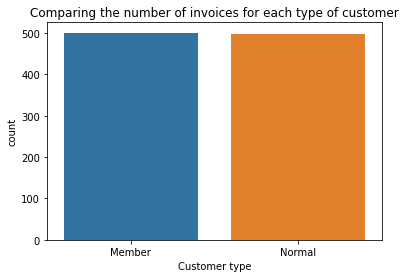

In [21]:
sns.countplot(data['Customer type'])
plt.title("Comparing the number of invoices for each type of customer")
plt.show()

In [22]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

According to the bar graph, the number of the '**Member**' type customers is **almost the same** as the number of the '**Normal**' type customers.

## Comparing the number of invoices for each type of payment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


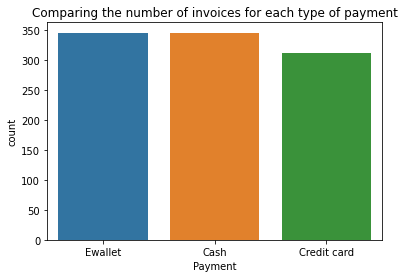

In [23]:
sns.countplot(data['Payment'])
plt.title("Comparing the number of invoices for each type of payment")
plt.show()

In [24]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

From this bar graph, we observe that **credit card** is the **least** used payment method by the customers.

## Comparing the number of invoices for each type of the product line

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


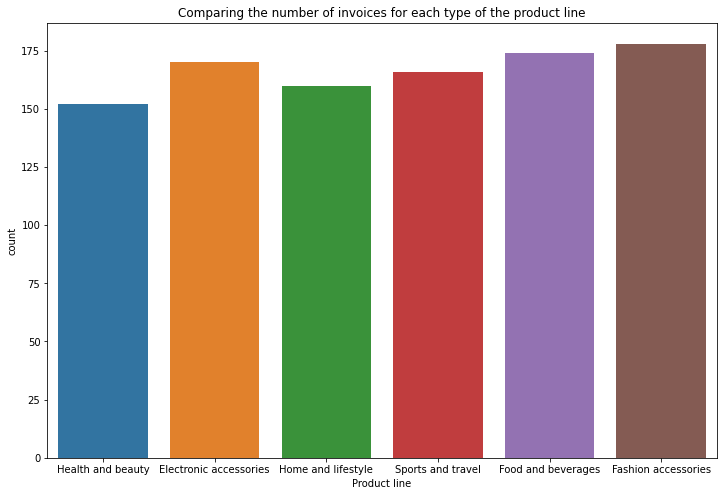

In [25]:
plt.figure(figsize = (12, 8))
sns.countplot(data['Product line'])
plt.title("Comparing the number of invoices for each type of the product line")
plt.show()

From the bar graph, we can see that **most customers** would buy items which are related to **fashion accessories**. 

On the other hand, the products which are in the '**Health and Beauty**' category are the **least** bought products.

## The relationship between the customer ratings and the gross income

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


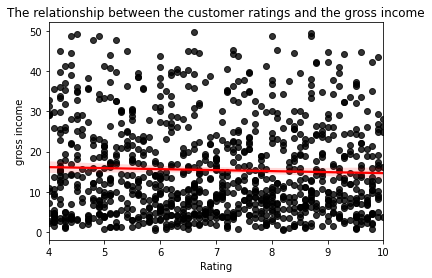

In [26]:
sns.regplot(data['Rating'], data['gross income'], scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("The relationship between the customer ratings and the gross income")
plt.show()

According to the scatter plot and the regression line, it **does not seem** that the customer ratings **affects** the gross income significantly.

## The distribution of the gross income for each branch

Text(0.5, 1.0, 'The distribution of the gross income for each branch')

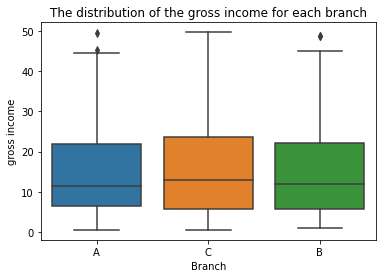

In [27]:
sns.boxplot(x = data['Branch'], y = data['gross income'])
plt.title("The distribution of the gross income for each branch")

From the boxplot graph, we can see that all **Branch C** has a **slightly higher average** of the gross income rather than **Branch A and Branch B**. 

But overall, **the distribution** of the gross income **is similar** for all of the 3 branches.

## The distribution of the gross income for each gender

Text(0.5, 1.0, 'The distribution of the gross income for each gender')

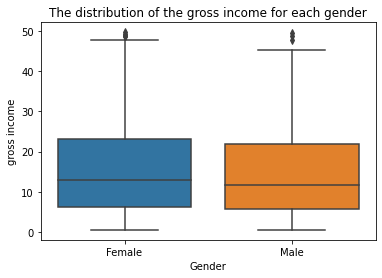

In [28]:
sns.boxplot(x = data['Gender'], y = data['gross income'])
plt.title("The distribution of the gross income for each gender")

From the boxplot graph, we can see that **female customers** contributes a slightly **higher average of the gross income** rather than **male customers**. 

But overall, **the distribution** of the **gross income** among the **female customers** is **slightly higher** than among the **male customers**.

## Aggregating the mean of the dataset by the index

In [29]:
data.groupby(data.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


## The fluctuation of the gross income in the first quarter of 2019

Text(0.5, 1.0, 'The fluctuation of the gross income in the first quarter of 2019')

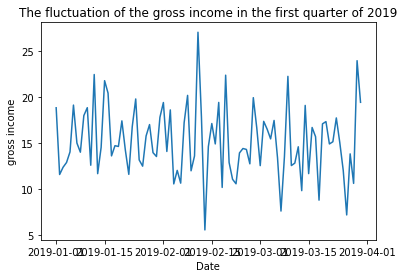

In [30]:
sns.lineplot(x = data.groupby(data.index).mean().index, y = data.groupby(data.index).mean()['gross income'])
plt.title("The fluctuation of the gross income in the first quarter of 2019")

According to the line graph, there **does not seem** to be any special feature from the **time trend of the gross income**.

## The average customer ratings for each branch

Text(0.5, 1.0, 'The average customer ratings for each branch')

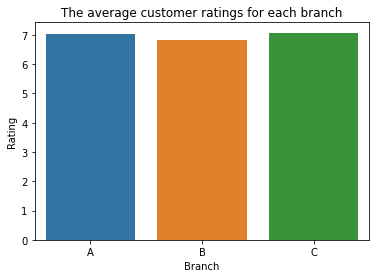

In [31]:
sns.barplot(x = data.groupby('Branch').mean().index, y = data.groupby('Branch').mean()['Rating'])
plt.title("The average customer ratings for each branch")

In [32]:
round(data.groupby('Branch').mean()['Rating'], 2)

Branch
A    7.03
B    6.82
C    7.07
Name: Rating, dtype: float64

From the bar graph, we can see that **Branch B** has a **slightly lower average** of the customer ratings than **Branch A and C**.

## The average customer ratings for each city

Text(0.5, 1.0, 'The average customer ratings for each city')

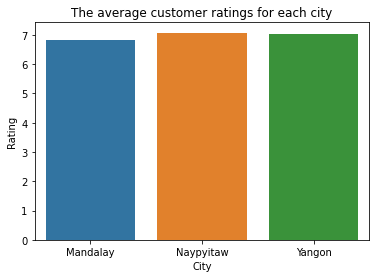

In [33]:
sns.barplot(x = data.groupby('City').mean().index, y = data.groupby('City').mean()['Rating'])
plt.title("The average customer ratings for each city")

In [34]:
round(data.groupby('City').mean()['Rating'], 2)

City
Mandalay     6.82
Naypyitaw    7.07
Yangon       7.03
Name: Rating, dtype: float64

From the bar graph, we can see that **Mandalay** has a **slightly lower** average of the customer ratings than the 2 other cities.

## The pairplot of the dataset

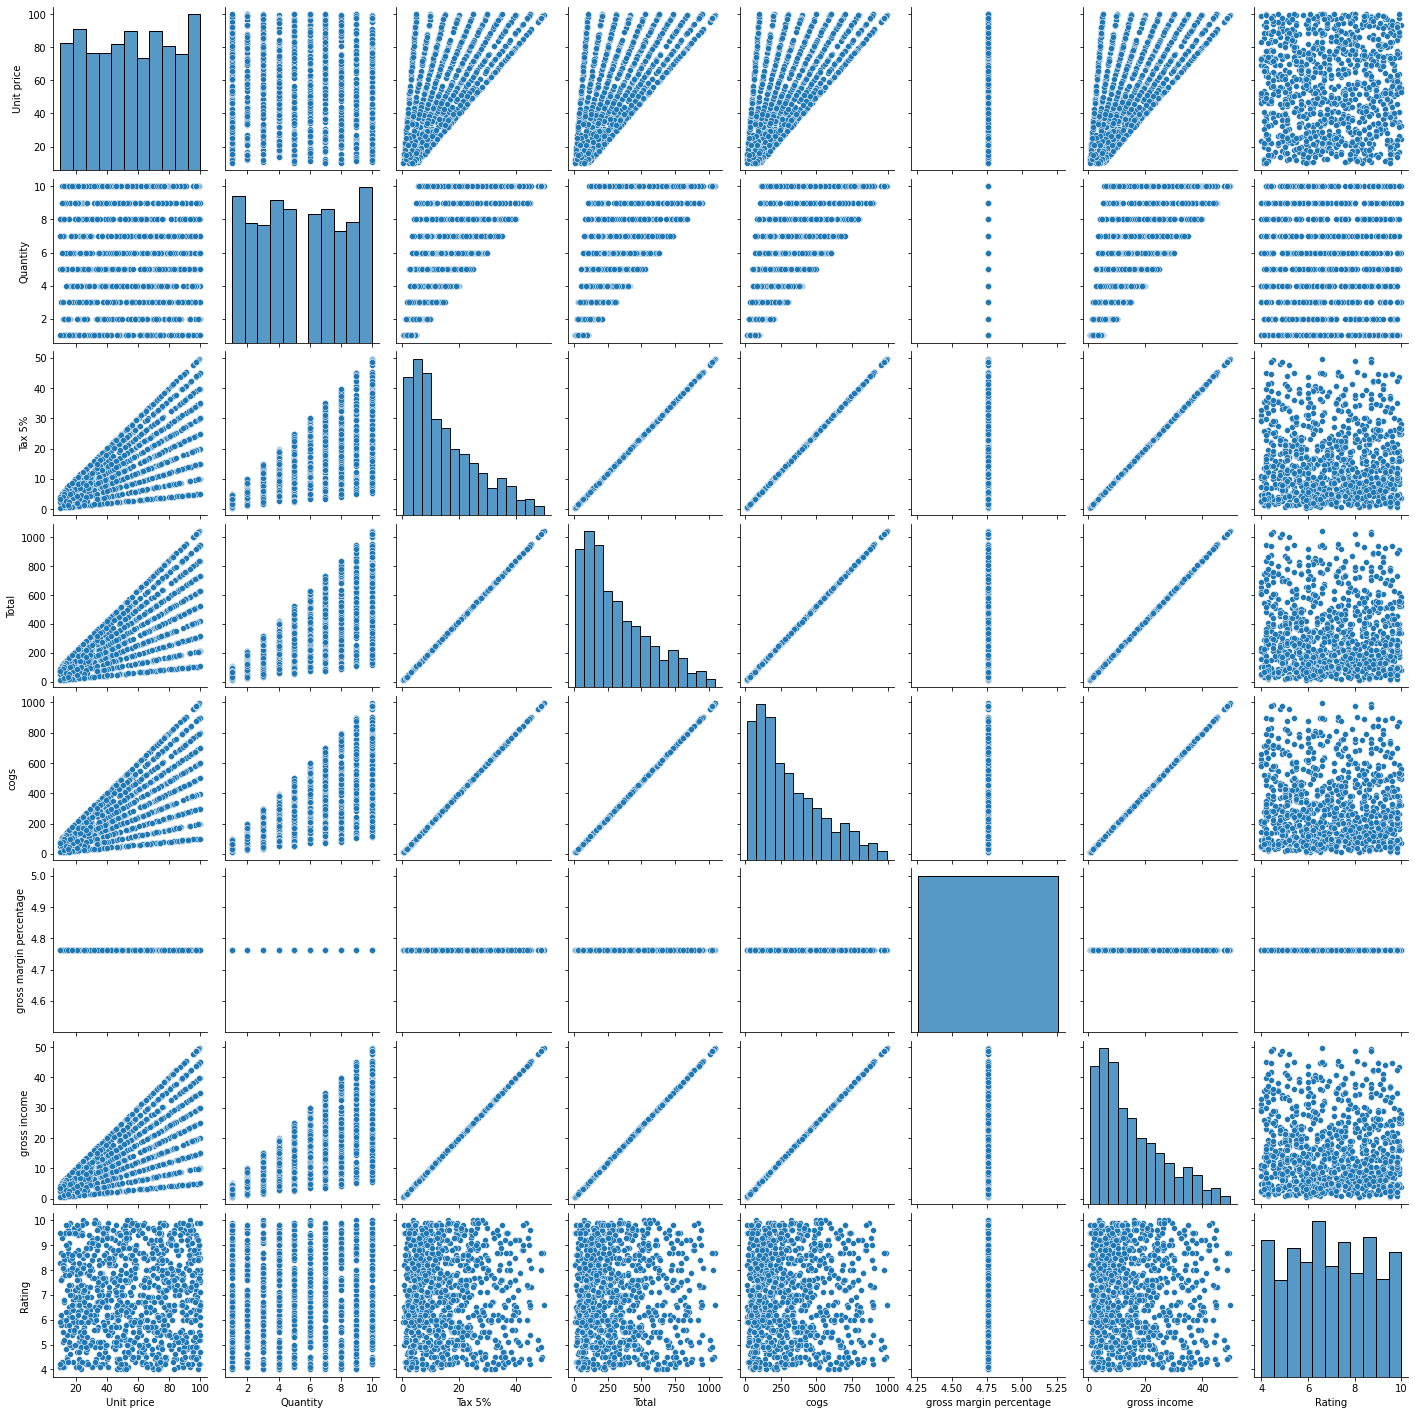

In [35]:
sns.pairplot(data)

## Checking on whether there are any duplicated data

In [36]:
data.duplicated().sum()

0

It is **very ideal** that there are **no duplicated rows** in a dataset.

Normally, if there are any **duplicated rows**, we will use **data.drop_duplicates(inplace = True)**

## Checking on whether there are any missing values in the dataset

In [37]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

It is also **very ideal** that this dataset has **no null values**.

Normally, if there is **any missing value**, we will use the **data.dropna()** or **data.fillna(data.mean(), inplace = True)**

## Checking the mode of each column from the dataset

In [38]:
data.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                               83.77
Quantity                                    10
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage                 4.7619
gross income                             4.154
Rating                                       6
Name: 0, dtype: object

The data above shows **the mode** for **each attribute** of the dataset.

## Calculating the correlation coefficient between the customer ratings and the gross income

In [39]:
np.corrcoef(data['Rating'], data['gross income'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [40]:
round(np.corrcoef(data['Rating'], data['gross income'])[0][1], 2)

-0.04

data['Rating'], data['gross income'])**[0][0]** indicates the **correlation coefficient** between the **customer ratings** and the **customer ratings**.

data['Rating'], data['gross income'])**[0][1]** indicates the **correlation coefficient** between the **customer ratings** and **the gross income**.

data['Rating'], data['gross income'])**[1][0]** indicates the **correlation coefficient** between the **gross income** and the **customer ratings**.

data['Rating'], data['gross income'])**[1][1]** indicates the **correlation coefficient** between the **gross income** and the **gross income**.

## Calculating the correlation coefficient between all the possible pairs of the attributes

In [41]:
np.round(data.corr(), 2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


## Visualizing the correlation coefficient in a heatmap

Text(0.5, 1.0, 'The Heatmap of The Correlation Coefficient of all pairs of Attributes')

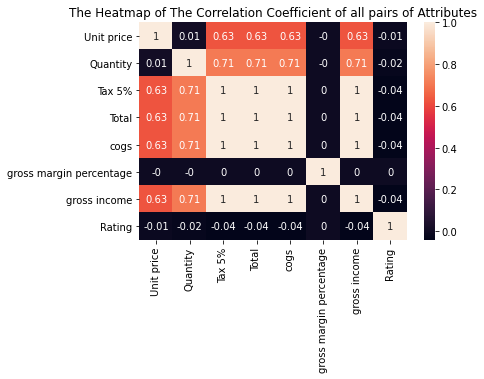

In [42]:
sns.heatmap(np.round(data.corr(), 2), annot = True)
plt.title("The Heatmap of The Correlation Coefficient of all pairs of Attributes")

According to the heatmap, we can see that the **gross margin percentage** is **completely independent** with **all of the attributes** (excluding the non-quantity attributes) of the dataset as its **correlation coefficient** with all of the other attributes is **0**.

Surprisingly, **the customer ratings** seems to have a **very little correlation** with **all of the other attributes** (excluding the non-quantity attributes) of the dataset.

## Conclusion

After analysing the dataset, I have made **3 recommendations** which may be helpful to improve the **supermarket sales** in the 3 big cities of Myanmar.

The **recommendations** are as follows:

-. Try to **improve the quality** of the supermarket stores in **Branch B**.

-. Try to make some **eye-catching promotion** for the '**Health and Beauty**' products in order **to boost the sales** of these products.

-. Try to **improve the quality** of the supermarket stores in **Mandalay**.

So this is **the end** of my project.

**Thank you** for reading through my project.

If there are any incorrect information or suggestions, feel free to send me a feedback.